In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv('Data.csv')

FileNotFoundError: ignored

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
data.describe()

NameError: ignored

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4233e9c610>,
      dtype=object)

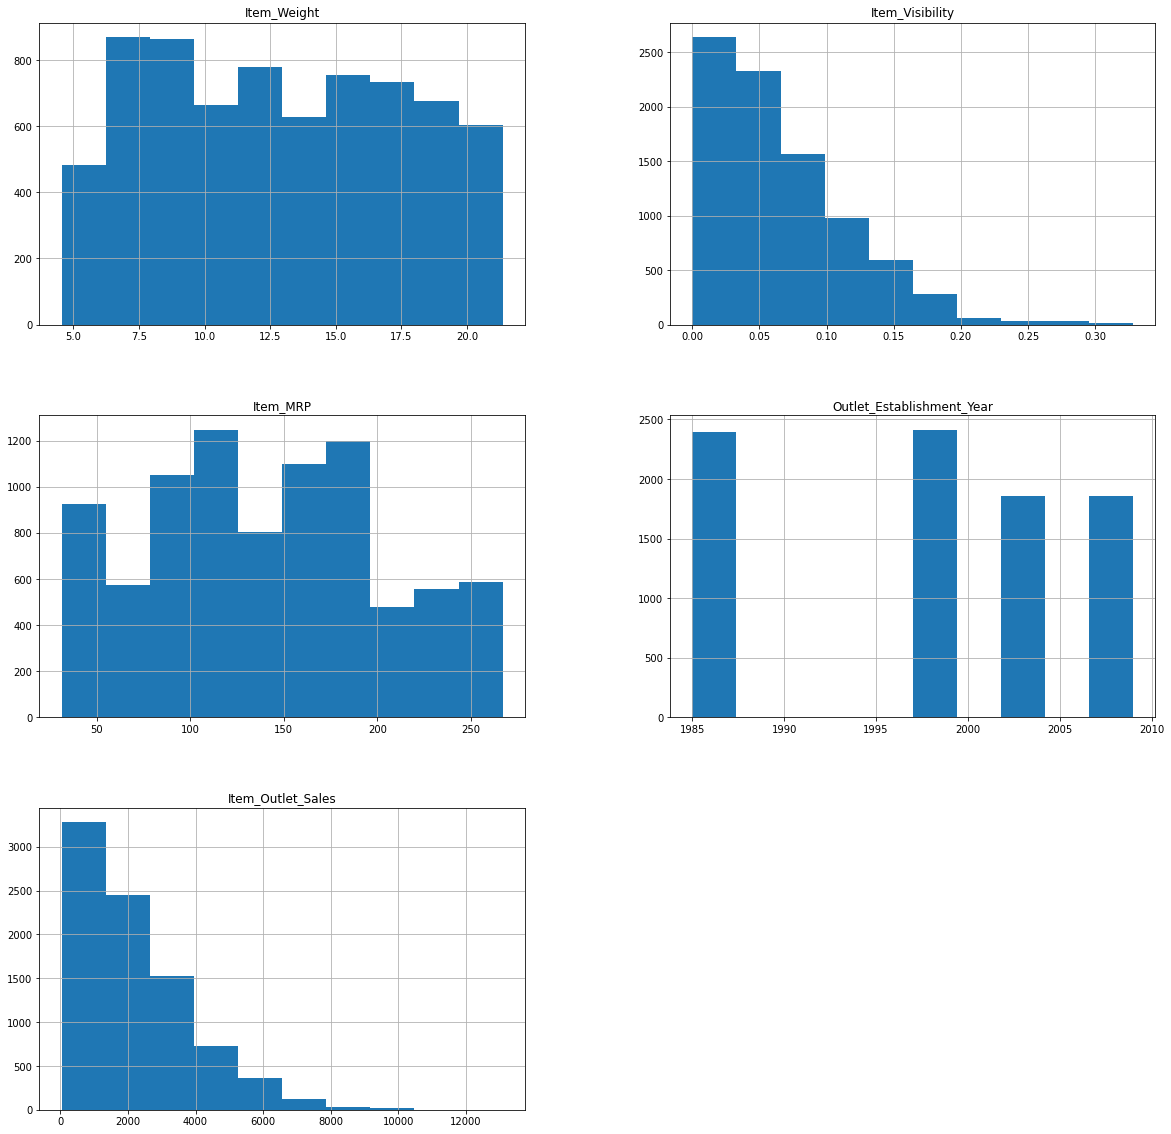

In [ ]:
data.hist(figsize=(20,20))

In [ ]:
corr_matrix=data.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data=data.drop(['Item_Weight'],axis=1)

In [ ]:
data.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDU12     9
FDX20     9
NCF42     9
         ..
FDY43     1
DRF48     1
FDQ60     1
FDO33     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
data.Item_Fat_Content=data.Item_Fat_Content.replace('LF','Low Fat')
data.Item_Fat_Content=data.Item_Fat_Content.replace('low fat','Low Fat')
data.Item_Fat_Content=data.Item_Fat_Content.replace('reg','Regular')

In [ ]:
data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
for x in data.columns:
    if data[x].dtype=='object':
        data[x]=data[x].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Identifier          8523 non-null   category
 6   Outlet_Establishment_Year  8523 non-null   int64   
 7   Outlet_Size                6113 non-null   category
 8   Outlet_Location_Type       8523 non-null   category
 9   Outlet_Type                8523 non-null   category
 10  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(3), int64(1)
memory usage: 386.9 KB


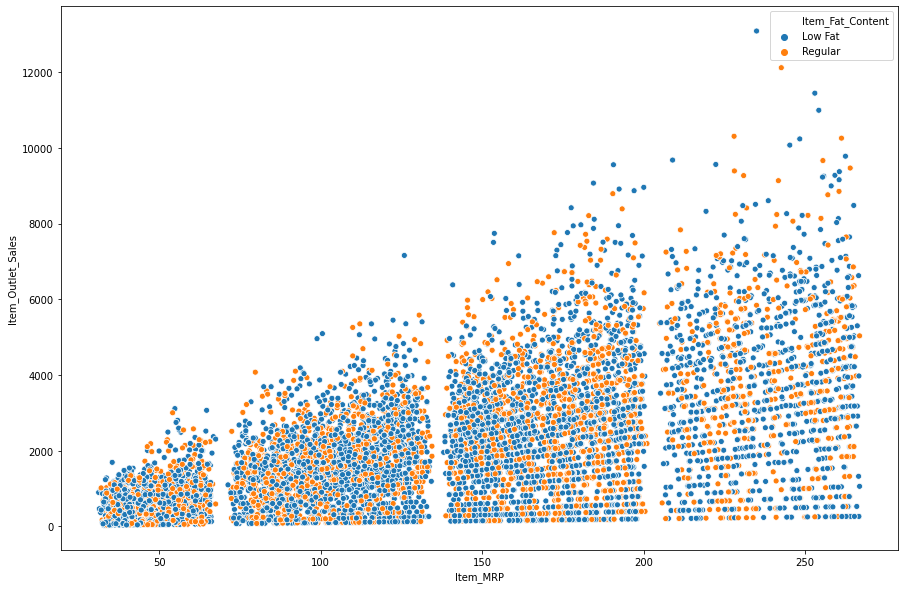

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(15,10))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=data)

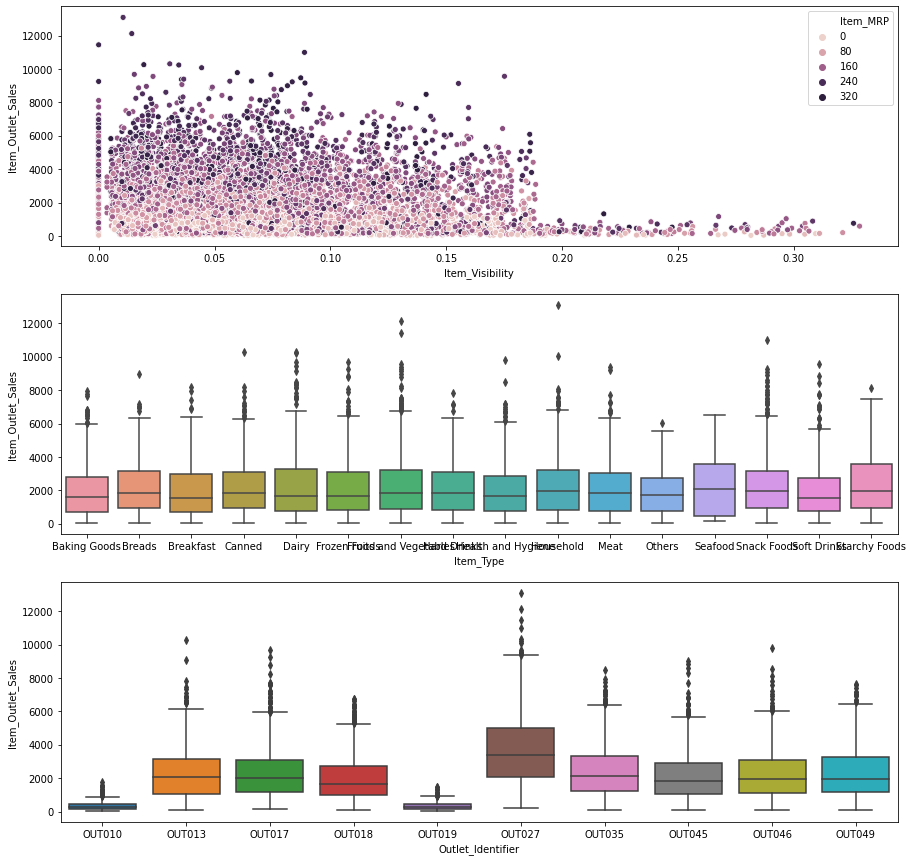

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(15,15))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=data)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=data)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=data)

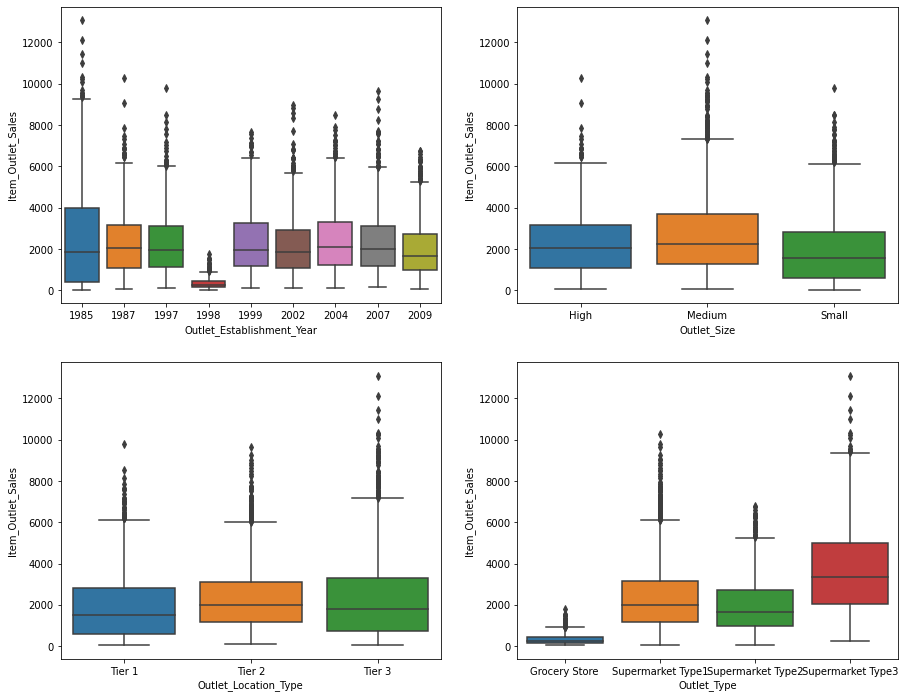

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=data)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=data)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=data)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=data)

In [ ]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']
data=data[attributes]

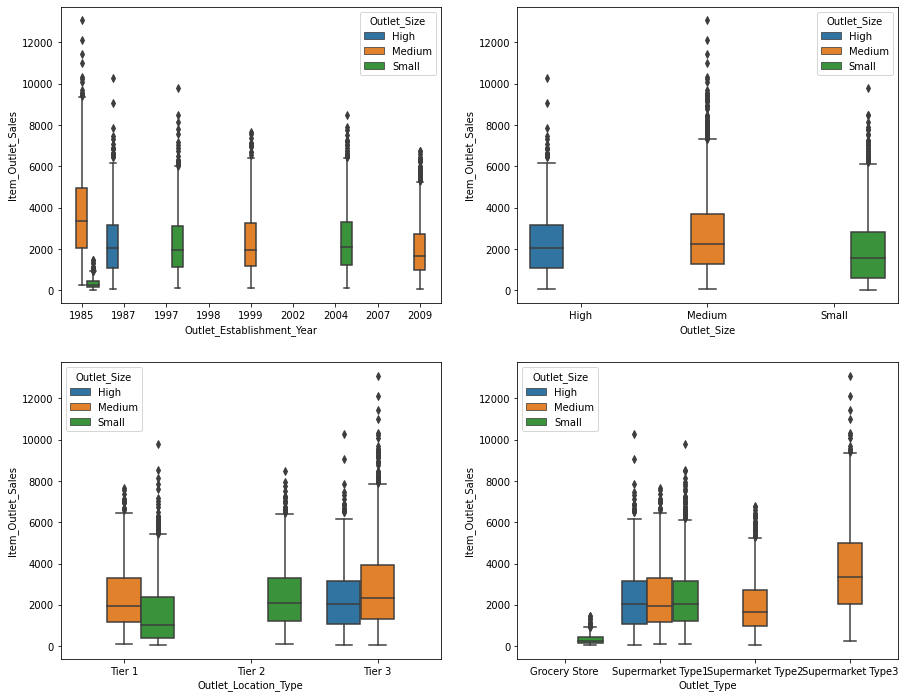

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=data)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=data)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=data)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=data)

In [ ]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,249.8092,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,48.2692,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,141.6180,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,182.0950,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
4,53.8614,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


In [ ]:
data.isnull().sum()

Item_MRP                        0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Size                  2410
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_Type                       0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,182.0950,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,96.9726,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,187.8214,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,45.9060,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,45.5086,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
...,...,...,...,...,...,...,...,...
8502,216.4192,Supermarket Type1,Tier 2,NaN,2002,OUT045,Household,3020.0688
8508,199.4742,Supermarket Type1,Tier 2,NaN,2002,OUT045,Fruits and Vegetables,2587.9646
8509,213.9902,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,424.7804
8514,57.5904,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,468.7232


In [ ]:
data.groupby(['Outlet_Location_Type','Outlet_Size'])['Outlet_Identifier'].value_counts()

Outlet_Location_Type  Outlet_Size  Outlet_Identifier
Tier 1                Medium       OUT049               930
                      Small        OUT046               930
                                   OUT019               528
Tier 2                Small        OUT035               930
Tier 3                High         OUT013               932
                      Medium       OUT027               935
                                   OUT018               928
Name: Outlet_Identifier, dtype: int64

In [ ]:
data.groupby('Outlet_Location_Type').Outlet_Identifier.value_counts()

Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT046               930
                      OUT049               930
                      OUT019               528
Tier 2                OUT035               930
                      OUT045               929
                      OUT017               926
Tier 3                OUT027               935
                      OUT013               932
                      OUT018               928
                      OUT010               555
Name: Outlet_Identifier, dtype: int64

In [ ]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [ ]:
def FillValues(dataset):
    if dataset.Outlet_Identifier == 'OUT017' :
        dataset.Outlet_Size = 'Medium'
    elif dataset.Outlet_Identifier == 'OUT035' :
        dataset.Outlet_Size = 'Small'
    elif dataset.Outlet_Identifier == 'OUT019' :
        dataset.Outlet_Size = 'Small'
    elif dataset.Outlet_Identifier == 'OUT027' :
        dataset.Outlet_Size = 'Medium'
    elif dataset.Outlet_Identifier == 'OUT013' :
        dataset.Outlet_Size = 'High'
    elif dataset.Outlet_Identifier == 'OUT046' :
        dataset.Outlet_Size = 'Small'
    elif dataset.Outlet_Identifier == 'OUT049' :
        dataset.Outlet_Size = 'Medium'
    elif dataset.Outlet_Identifier == 'OUT018' :
        dataset.Outlet_Size = 'Medium'
    elif dataset.Outlet_Identifier == 'OUT010' :
        dataset.Outlet_Size = 'High'
    elif dataset.Outlet_Identifier == 'OUT045' :
        dataset.Outlet_Size = 'Medium'
    return(dataset)

data=data.apply(FillValues,axis=1)

In [ ]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,249.8092,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,48.2692,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,141.6180,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,182.0950,Grocery Store,Tier 3,High,1998,OUT010,Fruits and Vegetables,732.3800
4,53.8614,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


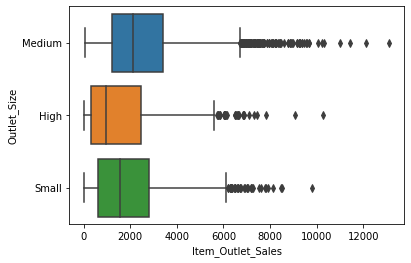

In [ ]:
sns.boxplot(x='Item_Outlet_Sales',y='Outlet_Size',data=data)

In [ ]:
data_label=data.Item_Outlet_Sales
data_dum=pd.get_dummies(data.iloc[:,0:6])
data_dum['Item_Outlet_Sales']=data_label
data_dum.head()

,Item_MRP,Outlet_Establishment_Year,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,249.8092,1999,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,48.2692,2009,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,443.4228
2,141.6180,1999,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,182.0950,1998,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,732.3800
4,53.8614,1987,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,994.7052


In [ ]:
train,test = train_test_split(data_dum,test_size=0.30,random_state=0)

In [ ]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

In [ ]:
lr=LinearRegression()
lr.fit(train,train_label)
predict_lr=lr.predict(test)
mse=mean_squared_error(test_label,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1152.633599364413

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train,train_label)
p=gbr.predict(test)
gb_score=mean_squared_error(test_label,p)
gb_score=np.sqrt(gb_score)
gb_score

1111.5461701848005

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train,train_label)
predict_r=rf.predict(test)
mse=mean_squared_error(test_label,predict_r)
rf_score=np.sqrt(mse)
rf_score

1247.6118171055282